In [1]:
from LRL import *

In [2]:
USE_CUDA

True

# Cartpole task

In [3]:
env = gym.make('CartPole-v0')

In [4]:
class CartpoleNN(nn.Module):
    def __init__(self, linear):
        super().__init__()
        
        self.layers = nn.Sequential(
                        linear(4, 128),
                        nn.ReLU(),
                        linear(128, 128),
                        nn.ReLU())
        
    def forward(self, x):
        return self.layers(x)

# Store experiment results

In [5]:
import time
import pandas as pd
results = pd.DataFrame(columns=["Reached 200", "Average reward", "Wall clock per frame"])

In [6]:
def store_res(name, agent, walltime):
    perfect = np.nonzero(np.array(agent.logger["rewards"]) == 200)[0]
    
    results.loc[name] = [perfect[0] if len(perfect) > 0 else None,
                         np.array(agent.logger["rewards"]).mean(),
                         walltime / len(agent.logger["loss"])]

## Classic DQN

In [7]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [8]:
agent = eGreedy(TargetQAgent(QAgent(ReplayBufferAgent)))(config)

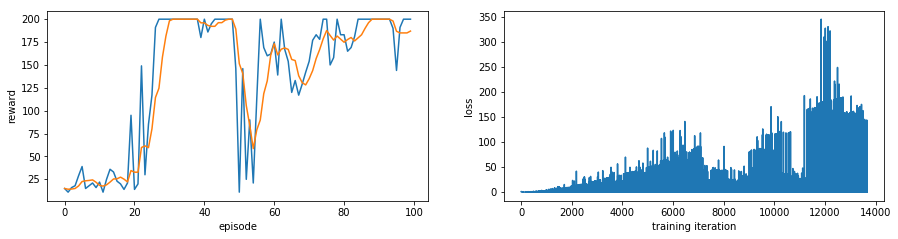

Complete in  253.63468265533447


In [9]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [10]:
store_res("DQN", agent, end - start)

## Double DQN

In [11]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [12]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(config)

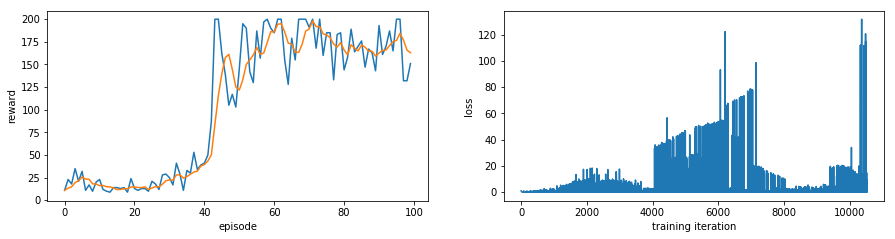

Complete in  212.6579852104187


In [13]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [14]:
store_res("Double DQN", agent, end - start)

## Dueling Double DQN

In [15]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingQnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [16]:
agent = eGreedy(DoubleQAgent(QAgent(ReplayBufferAgent)))(config)

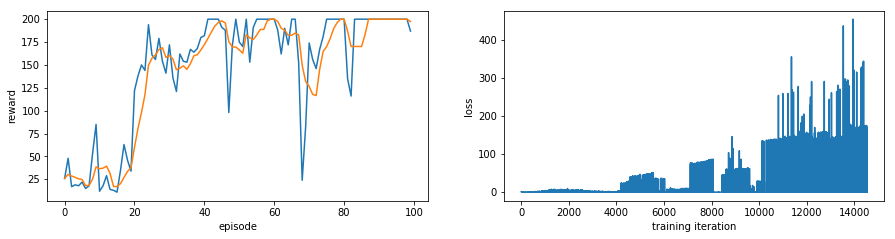

Complete in  385.8860993385315


In [17]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [18]:
store_res("Dueling Double DQN", agent, end - start)

## Double DQN + Prioritized

In [19]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [20]:
agent = eGreedy(DoubleQAgent(QAgent(PrioritizedBufferAgent)))(config)

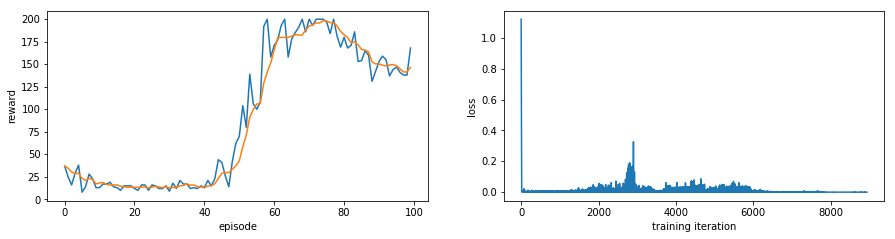

Complete in  177.79735016822815


In [21]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [22]:
store_res("Prioritized Double DQN", agent, end - start)

## Noisy Double DQN

In [23]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "linear_layer": NoisyLinear,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500
}

In [24]:
agent = DoubleQAgent(QAgent(ReplayBufferAgent))(config)

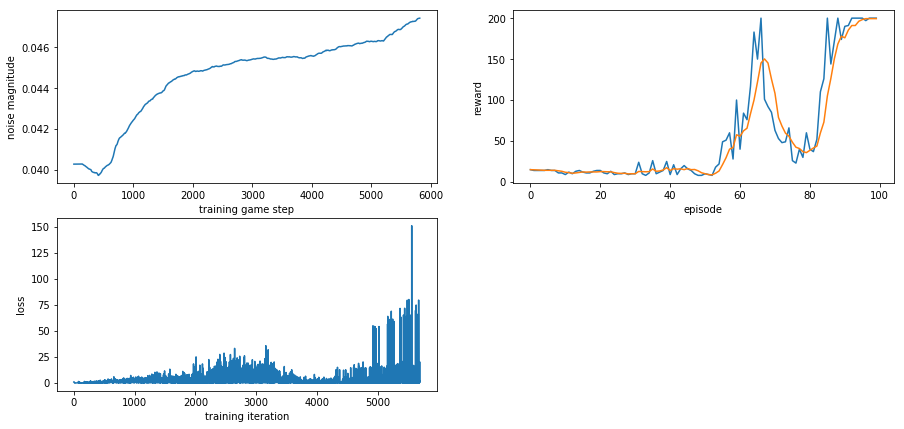

Complete in  272.49432826042175


In [25]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [26]:
store_res("Noisy Double DQN", agent, end - start)

## NoisyNet + Double DQN + Prioritized

In [27]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": Qnetwork,
    "linear_layer": NoisyLinear,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [28]:
agent = DoubleQAgent(QAgent(PrioritizedBufferAgent))(config)

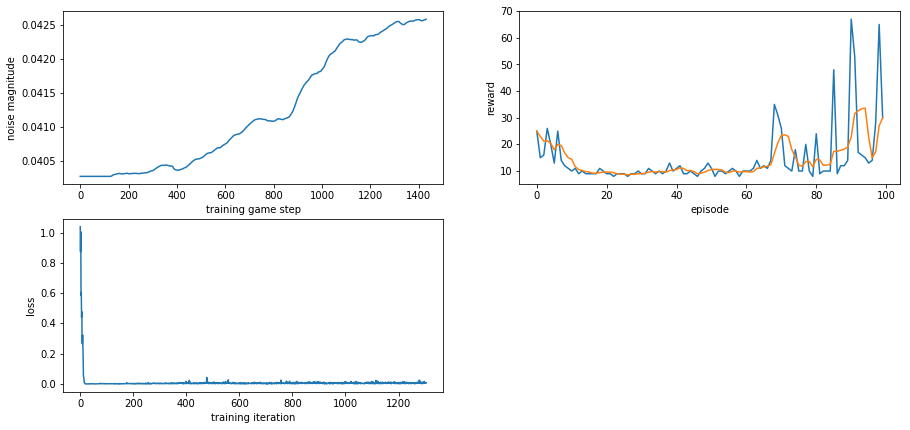

Complete in  86.91034698486328


In [29]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [30]:
store_res("Noisy Prioritized Double DQN", agent, end - start)

## Dueling + NoisyNet + Double DQN + Prioritized

In [31]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingQnetwork,
    "linear_layer": NoisyLinear,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 100
}

In [32]:
agent = DoubleQAgent(QAgent(PrioritizedBufferAgent))(config)

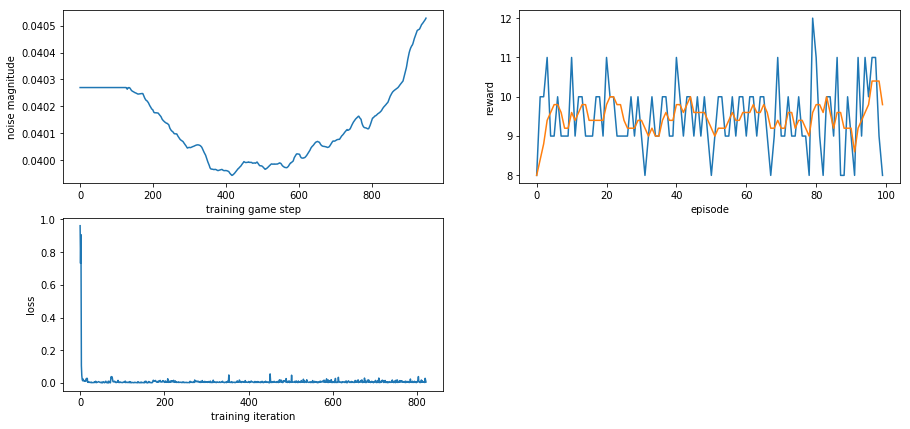

Complete in  73.3990330696106


In [33]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [34]:
store_res("Noisy Prioritized Dueling Double DQN", agent, end - start)

# Categorical

In [35]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [36]:
agent = eGreedy(CategoricalQAgent(ReplayBufferAgent))(config)

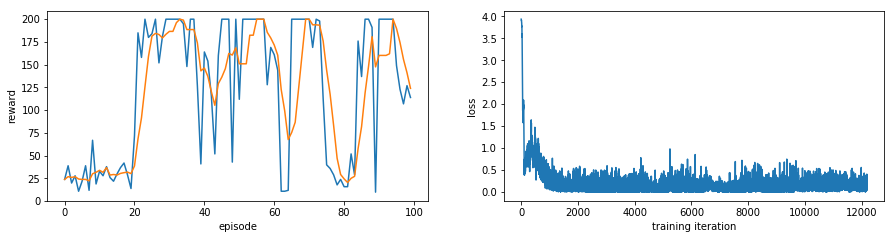

Complete in  290.53947353363037


In [37]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [38]:
store_res("Categorical DQN", agent, end - start)

# Categorical + Target

In [39]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [40]:
agent = eGreedy(TargetQAgent(CategoricalQAgent(ReplayBufferAgent)))(config)

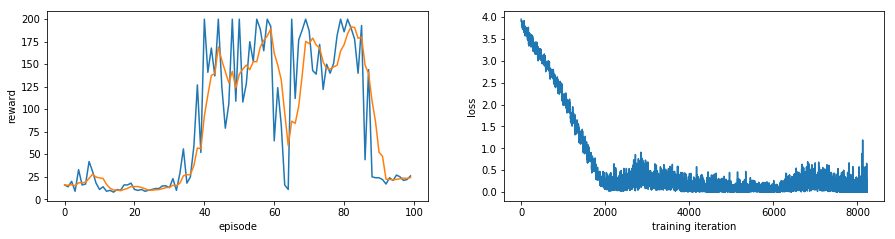

Complete in  204.92467999458313


In [41]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [42]:
store_res("Categorical DQN with target-net", agent, end - start)

# Categorical + Double

In [43]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [44]:
agent = eGreedy(DoubleQAgent(CategoricalQAgent(ReplayBufferAgent)))(config)

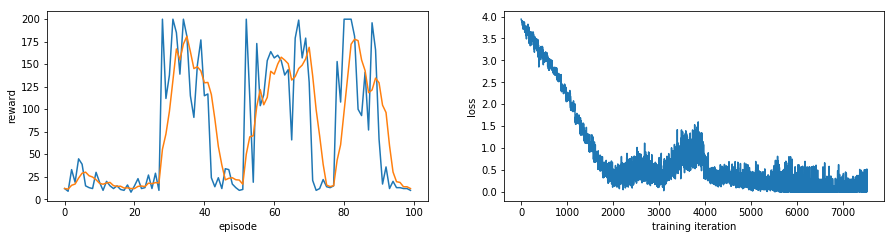

Complete in  196.6553771495819


In [45]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [46]:
store_res("Categorical Double DQN", agent, end - start)

# Categorical + Double + PrioritizedReplayBuffer

In [47]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 500,    
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [48]:
agent = eGreedy(DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent)))(config)

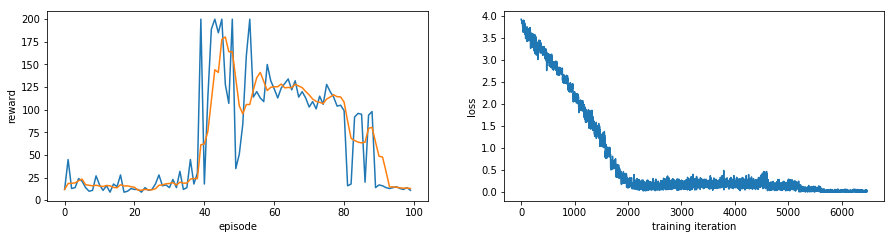

Complete in  173.78776788711548


In [49]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [50]:
store_res("Categorical Prioritized Double DQN", agent, end - start)

# Categorical + Double + PrioritizedReplayBuffer + Noisy

In [51]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": CategoricalQnetwork,
    "linear_layer": NoisyLinear,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [52]:
agent = DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent))(config)

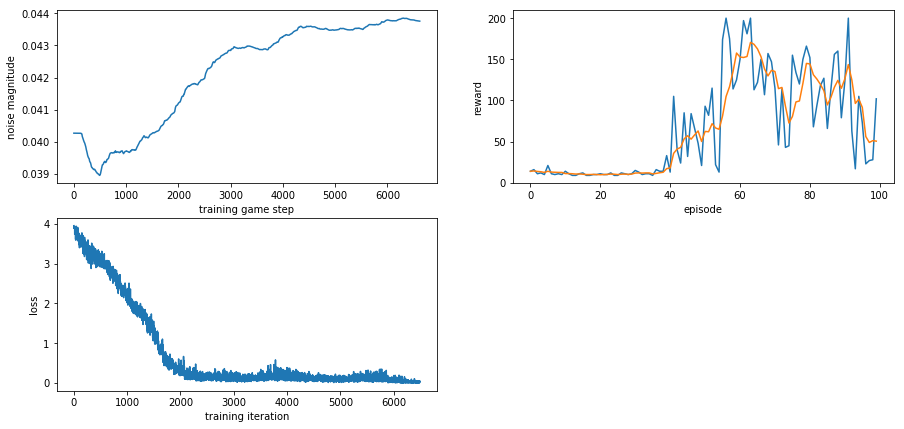

Complete in  349.77032589912415


In [53]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [54]:
store_res("Noisy Categorical Prioritized Double DQN", agent, end - start)

# Categorical + Double + PrioritizedReplayBuffer + Noisy + Dueling

In [55]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingCategoricalQnetwork,
    "linear_layer": NoisyLinear,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [56]:
agent = DoubleQAgent(CategoricalQAgent(PrioritizedBufferAgent))(config)

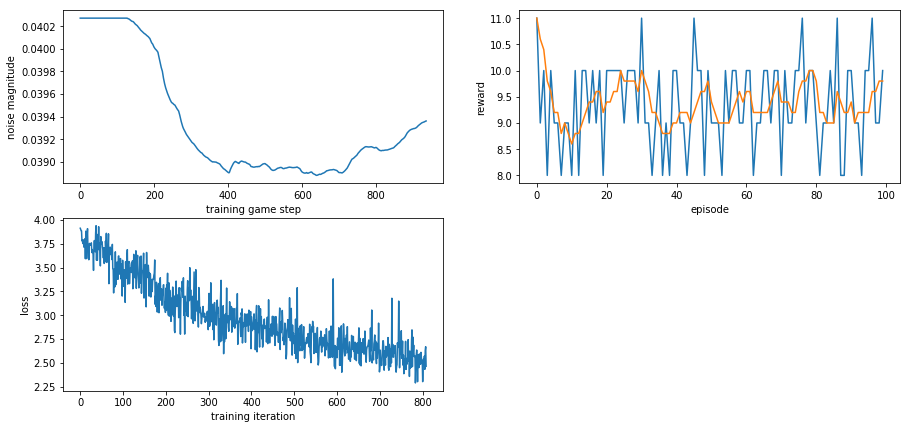

Complete in  77.88871836662292


In [57]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [58]:
store_res("Noisy Categorical Prioritized Dueling Double DQN", agent, end - start)

# Rainbow

In [59]:
config = {
    "env": env,
    "FeatureExtractor": CartpoleNN,
    "QnetworkHead": DuelingCategoricalQnetwork,
    "linear_layer": NoisyLinear,
    "batch_size": 32,
    "gamma": 0.99,
    "target_update": 100,
    "replay_buffer_nsteps": 2,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 1000,
    "rp_alpha": 0.6, "rp_beta_start": 0.4, "rp_beta_frames": 1000,
    "Vmin": -10, "Vmax": 10, "num_atoms": 51
}

In [60]:
agent = DoubleQAgent(CategoricalQAgent(NstepReplay(PrioritizedBufferAgent)))(config)

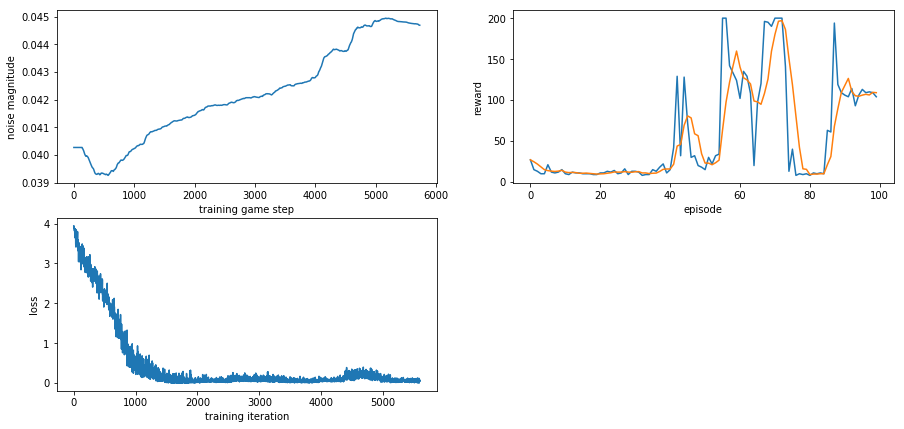

Complete in  338.7966229915619


In [61]:
start = time.time()

for i in range(100):
    agent.play()
    plot_durations(agent, 5)    

end = time.time()
print('Complete in ', end - start)
plt.show()

In [62]:
store_res("Rainbow", agent, end - start)

# RESULTS

In [63]:
results

,Reached 200,Average reward,Wall clock per frame
DQN,27.0,137.90,0.018564
Double DQN,43.0,106.61,0.020188
Dueling Double DQN,41.0,146.64,0.026545
Prioritized Double DQN,58.0,90.70,0.019881
Noisy Double DQN,66.0,58.17,0.047890
Noisy Prioritized Double DQN,NaN,14.32,0.066598
Noisy Prioritized Dueling Double DQN,NaN,9.49,0.089293
Categorical DQN,23.0,123.14,0.023840
Categorical DQN with target-net,40.0,83.57,0.024900
Categorical Double DQN,28.0,76.55,0.026123


In [64]:
env.close()